# import the laibraries as per the requirment

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description: 
age - Age of Customer 

ed - Eductation level of customer 

employ: Tenure with current employer (in years) 

address: Number of years in same address 

income: Customer Income 

debtinc: Debt to income ratio

creddebt: Credit to Debt ratio

othdebt: Other debts 

default: Customer defaulted in the past (1= defaulted, 0=Never defaulted) 

Project Approach:
Table shows the list of data pre-processing, analysis, visualization and model
building techniques that needs to be implemented to complete the project

In [2]:
# read the data
df = pd.read_csv("C:/Users/AVITA/Desktop/Assignment_Krapendra/April Assessment/ML_P2/Data/Data/bankloans.csv")
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
# check the number of row and column
df.shape

(850, 9)

# cleaning our data and handle unwanted data

In [4]:
# check the null value
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [5]:
df['default'].tail()

845   NaN
846   NaN
847   NaN
848   NaN
849   NaN
Name: default, dtype: float64

In [6]:
#Describe the data

df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [7]:
# Checking basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [8]:
# Find the duplicates

df.duplicated().sum()

0

In [9]:
# find the unique values


df['default'].unique()

# df['Sex'].unique()

array([ 1.,  0., nan])

C:\Users\AVITA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

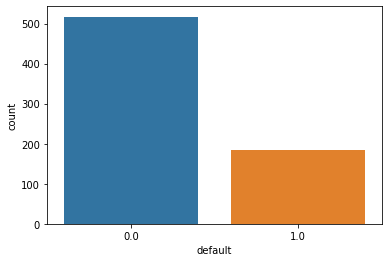

In [10]:
#Plot the unique values

sns.countplot(df['default'])

In [11]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [12]:
# #Replace null values with mode

# df.replace(np.nan,'0',inplace = True)
df = df.fillna(df.mode().iloc[0])

#Check the changes now
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [13]:
#create correlation matrix
df.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.012983,0.554241,0.599949,0.476218,0.008240,0.278907,0.337841,-0.131556
ed,0.012983,1.000000,-0.151117,0.052927,0.218219,0.008053,0.099080,0.140937,0.107925
employ,0.554241,-0.151117,1.000000,0.344664,0.625093,-0.033625,0.381741,0.414431,-0.258410
address,0.599949,0.052927,0.344664,1.000000,0.308340,-0.032939,0.161641,0.185481,-0.150376
income,0.476218,0.218219,0.625093,0.308340,1.000000,-0.035585,0.551515,0.603352,-0.074274
debtinc,0.008240,0.008053,-0.033625,-0.032939,-0.035585,1.000000,0.514965,0.572548,0.355378
creddebt,0.278907,0.099080,0.381741,0.161641,0.551515,0.514965,1.000000,0.644952,0.208834
othdebt,0.337841,0.140937,0.414431,0.185481,0.603352,0.572548,0.644952,1.000000,0.120898
default,-0.131556,0.107925,-0.258410,-0.150376,-0.074274,0.355378,0.208834,0.120898,1.000000


# check the correlations between each variable with percentage 

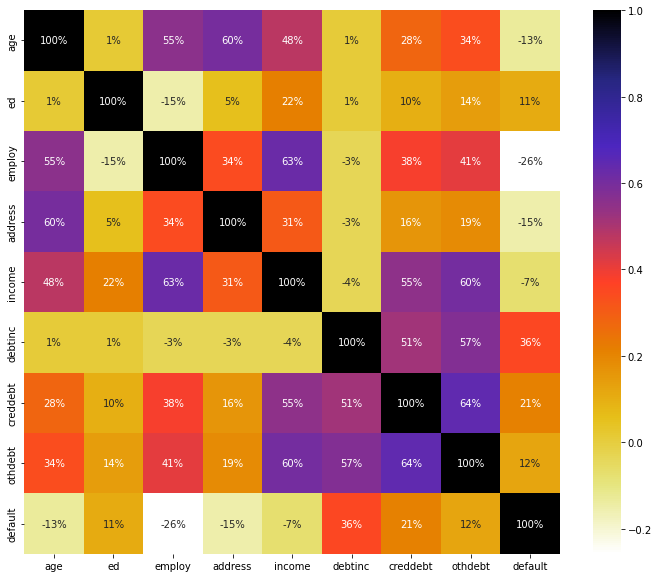

In [14]:
# check the relation in heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap="CMRmap_r",annot=True,fmt='.0%')
plt.show()

# univariate analysis single variable

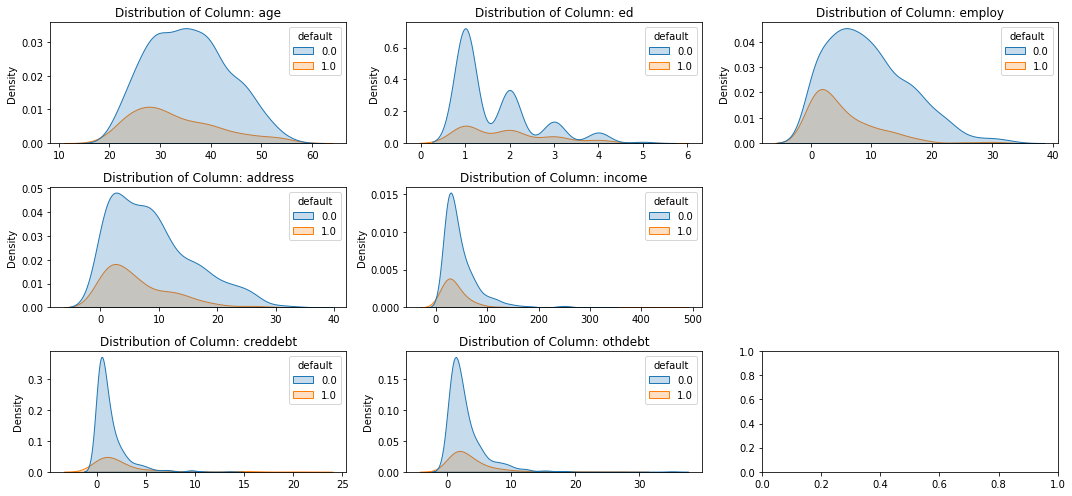

In [15]:
# check relation of density with each variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 7), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = df.columns[:-1]  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    data = df[[col, 'default']]  # select the data
    sns.kdeplot(data=data, x=col, hue='default', fill=True, ax=ax)
    ax.set(title=f'Distribution of Column: {col}', xlabel=None)
    
fig.delaxes(axes[5])  # delete the empty subplot
fig.tight_layout()
plt.show()


# BI variate Analysis between two variable 

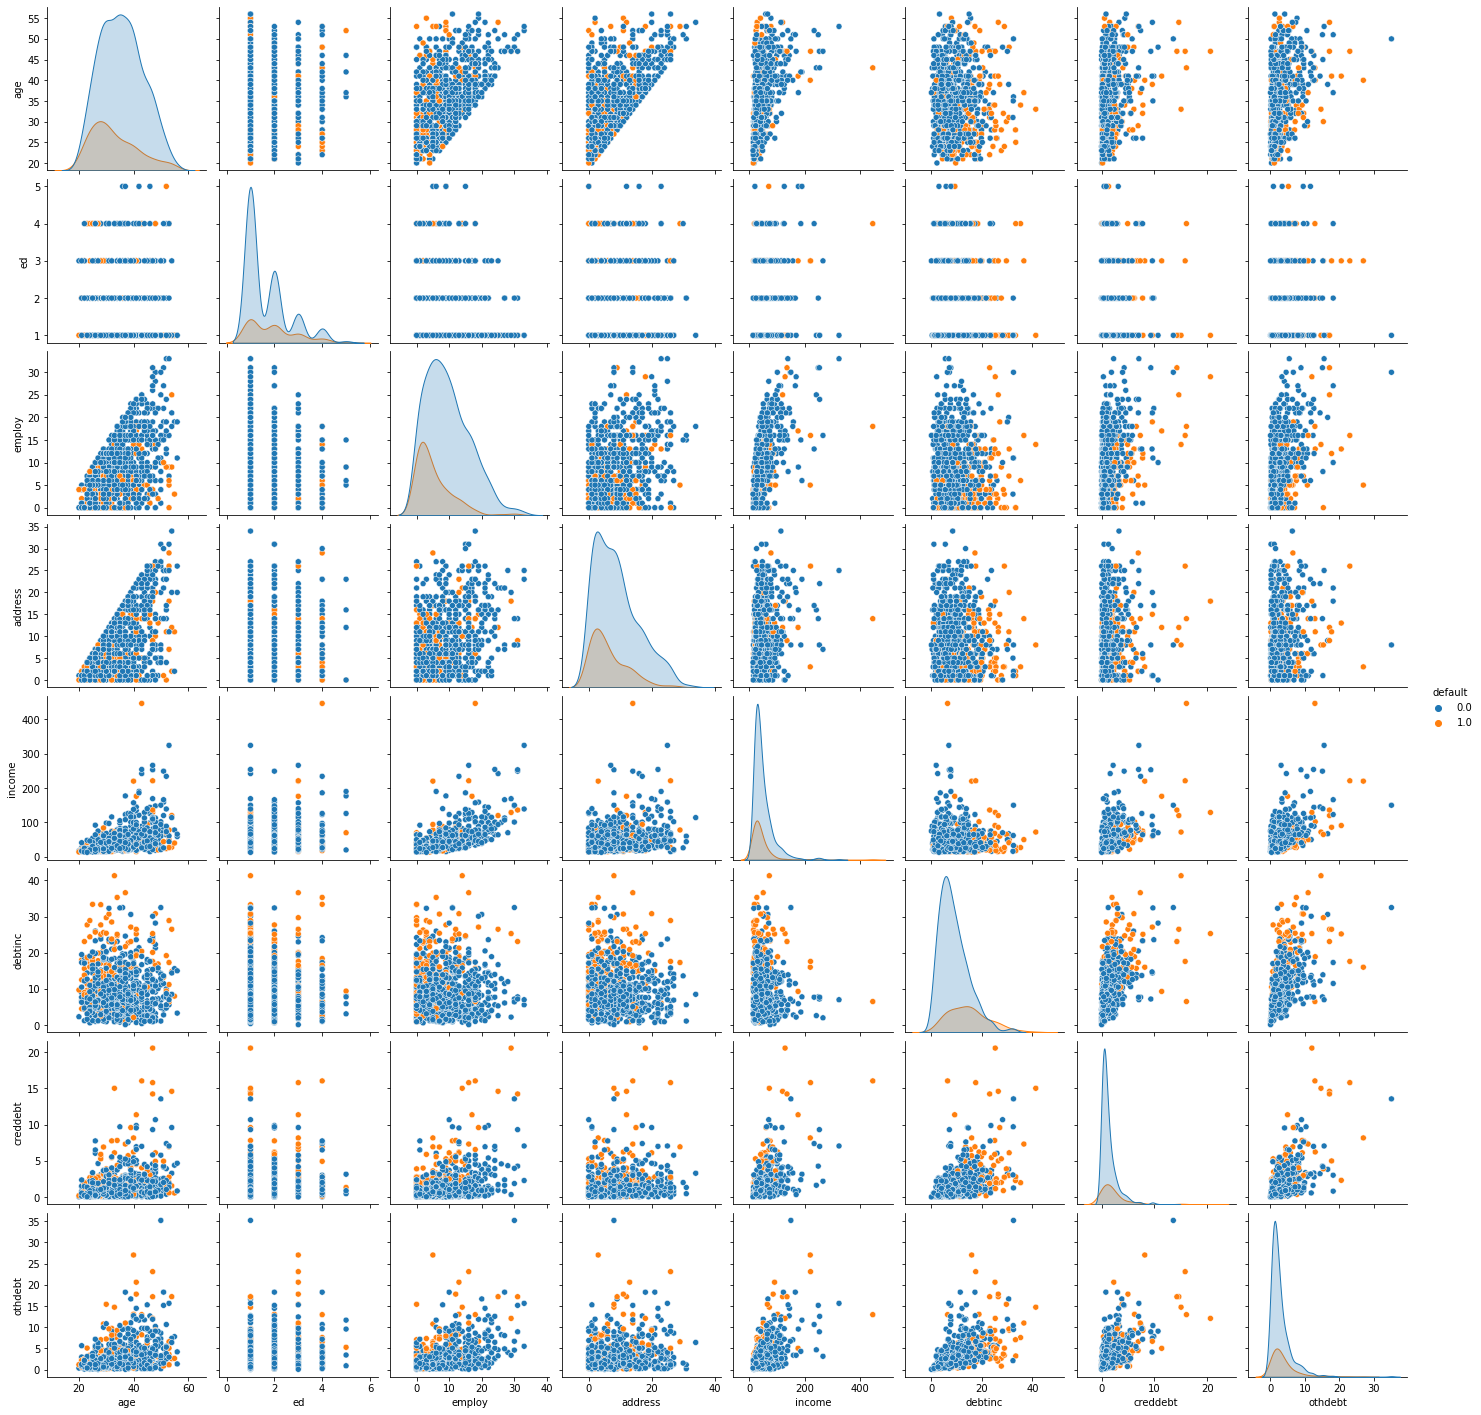

In [16]:
# BI variate Analysis

sns.pairplot(df, hue="default", diag_kind="kde")

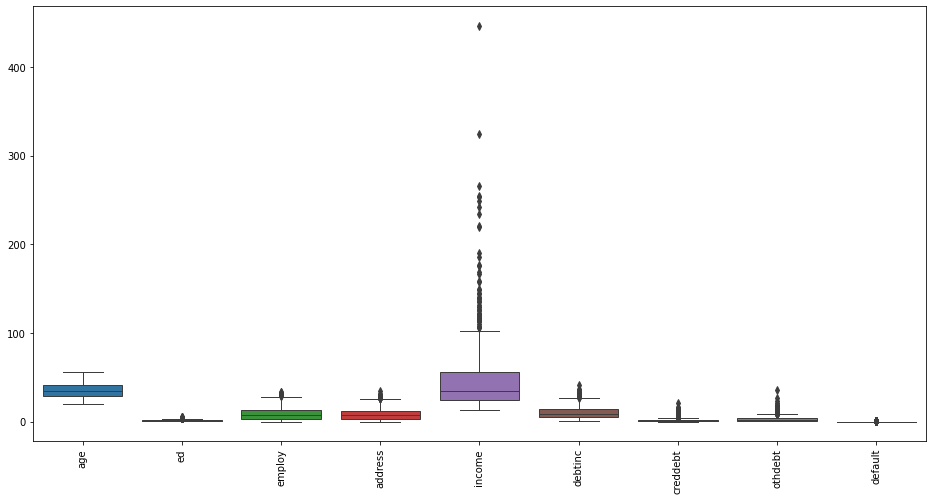

In [17]:
# Checking the outliers of MinMax Scaler data

fig = plt.figure(figsize =(16, 8))
sns.boxplot(data= df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [18]:
# Saperate the x and y variable
X = df.drop(["default"],axis=1)
y = df['default']

In [19]:
X.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt'],
      dtype='object')

In [20]:
# create a function to find outliers using IQR
# def find_outliers_IQR(df):

#     q1=df.quantile(0.25)

#     q3=df.quantile(0.75)

#     IQR=q3-q1

#     outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

#     return outliers

In [21]:
# Use StandardScaler to standardize the data i.e range (-1 +1)
from sklearn.preprocessing import StandardScaler
standardized=StandardScaler()
standardized_df=pd.DataFrame(standardized.fit_transform(X),columns=X.columns)

In [22]:
standardized_df

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,0.742915,1.390594,1.245091,0.526521,3.357307,-0.129797,4.604461,0.568128
1,-0.999093,-0.766349,0.211712,-0.344185,-0.406935,1.061480,-0.101009,0.271434
2,0.618486,-0.766349,0.949840,0.816756,0.216112,-0.695653,-0.339233,-0.267859
3,0.742915,-0.766349,0.949840,0.816756,1.903530,-1.082817,0.509235,-0.664598
4,-1.372381,0.312122,-0.969292,-1.214891,-0.484816,1.061480,0.099140,-0.006543
...,...,...,...,...,...,...,...,...
845,-0.128089,-0.766349,0.506963,0.961874,-0.380975,-1.112599,-0.629523,-0.722478
846,-0.376947,0.312122,0.506963,0.381403,1.799689,-0.665871,1.153119,-0.145283
847,1.613920,-0.766349,0.654589,0.381403,-0.225213,0.093568,-0.402196,0.089174
848,-0.003660,0.312122,-1.116917,0.381403,-0.588657,-0.353161,-0.545681,-0.478169


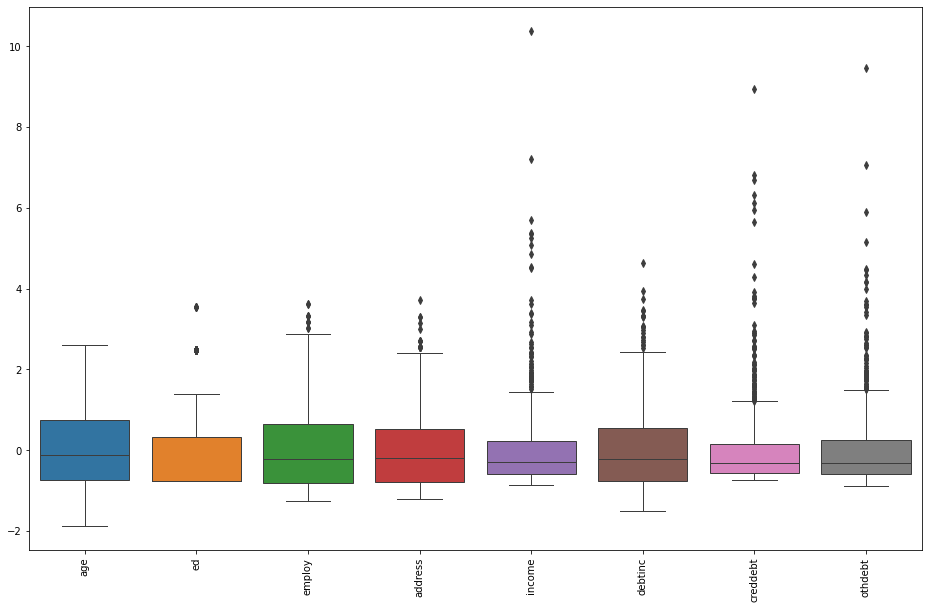

In [23]:
# Checking the outliers of StandardScaler Data
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= standardized_df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

# Capping Method approach with Standardized Data

In [24]:
def replace_outliers_st(standardized_df,columns):
    for col in columns:
        Q1=standardized_df[col].quantile(0.25)
        Q3=standardized_df[col].quantile(0.75)
        
 

        IQR=Q3-Q1
        
        lower_bound=Q1 - 1.5*IQR
        upper_bound=Q3 + 1.5*IQR
        
        #replace min and max value with lower_bound and upper_bound
        standardized_df.loc[(standardized_df[col]>upper_bound),col] = upper_bound
        standardized_df.loc[(standardized_df[col]<lower_bound),col] = lower_bound

        
    return standardized_df

In [25]:
# Columns to replace 
columns=['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']


# call the function
standardized_df = replace_outliers_st(standardized_df, columns)

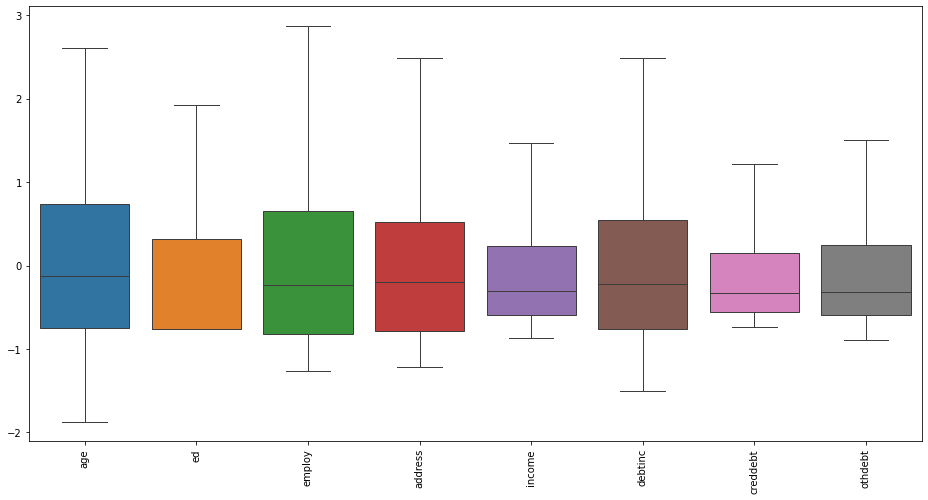

In [26]:
# after the removeing outliers make box plot 

fig = plt.figure(figsize =(16, 8))
sns.boxplot(data= standardized_df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [27]:
# check the VIF and select the independetn important feature 
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X.columns
  
# calculating VIF for each feature
vif_data1["VIF"] = [variance_inflation_factor(X.values, k) 
                           for k in range(len(X.columns))]
  
print(vif_data1)

    feature        VIF
0       age  16.268190
1        ed   4.821824
2    employ   5.821770
3   address   3.535641
4    income   9.497594
5   debtinc   8.235337
6  creddebt   3.680020
7   othdebt   5.932401


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 53.2 KB


In [29]:
# features selection using mutual classific
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

debtinc     0.077083
creddebt    0.061195
address     0.047547
employ      0.030253
age         0.021229
income      0.006278
othdebt     0.006143
ed          0.000152
dtype: float64

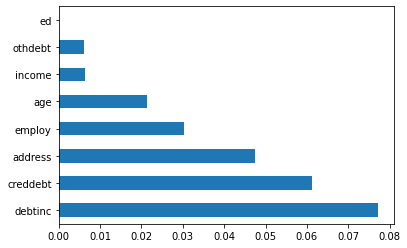

In [30]:
mutual_data.nlargest(8).plot(kind="barh")
plt.show()

In [31]:
standardized_df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,0.742915,1.390594,1.245091,0.526521,1.471941,-0.129797,1.221899,0.568128
1,-0.999093,-0.766349,0.211712,-0.344185,-0.406935,1.061480,-0.101009,0.271434
2,0.618486,-0.766349,0.949840,0.816756,0.216112,-0.695653,-0.339233,-0.267859
3,0.742915,-0.766349,0.949840,0.816756,1.471941,-1.082817,0.509235,-0.664598
4,-1.372381,0.312122,-0.969292,-1.214891,-0.484816,1.061480,0.099140,-0.006543


In [32]:
y.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: default, dtype: float64

In [33]:
#  divided into train_test_split on standardization 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(standardized_df,y, test_size = 0.2,random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)

(680, 8)
(170, 8)


In [38]:
# import the packages

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [43]:
# Create instances of the classification algorithms

models={'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_leaf_nodes =20,random_state = 42),
    }


In [44]:
# using the function and fit the model get accaracy both the model
def evaluation_norm(true, predict):
    accuracy = accuracy_score(true, predict)
    precision = precision_score(true, predict )
    recall = recall_score(true, predict)
    f1 = f1_score(true, predict)
    confusion = confusion_matrix(true, predict)
    
    return accuracy, precision, recall, f1, confusion


results_norm = {}  # dictionary to store the performance metrics for each model

for name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluate the performance of the model
    accuracy, precision, recall, f1, confusion = evaluation_norm(y_test, y_pred_test)
    accuracy_train, precision_train, recall_train, f1_train, confusion_train = evaluation_norm(y_train, y_pred_train)
    
    # Store the performance metrics in the results dictionary
    results_norm[name] = {'accuracy': accuracy,
                     'precision': precision,
                     'recall': recall,
                     'f1': f1,
                     'confusion': confusion}
    
    # Print the performance metrics for the model
    print(f"{name}:")
    print(f"Accuracy_train: {accuracy_train:.2f}")
    print(f"Precision_train: {precision_train:.2f}")
    print(f"Recall_train: {recall_train:.2f}")
    print(f"F1 score_train: {f1_train:.2f}")
    print(f"Confusion matrix:\n{confusion_train}\n")
    
    print("------------------------------------------------------")

    
    # Print the performance metrics for the model
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print(f"Confusion matrix:\n{confusion}\n")
    
    print("------------------------------------------------------")
    print("------------------------------------------------------")

LogisticRegression:
Accuracy_train: 0.81
Precision_train: 0.62
Recall_train: 0.33
F1 score_train: 0.43
Confusion matrix:
[[505  29]
 [ 98  48]]

------------------------------------------------------
LogisticRegression:
Accuracy: 0.82
Precision: 0.67
Recall: 0.38
F1 score: 0.48
Confusion matrix:
[[126   7]
 [ 23  14]]

------------------------------------------------------
------------------------------------------------------
DecisionTreeClassifier:
Accuracy_train: 0.85
Precision_train: 0.65
Recall_train: 0.68
F1 score_train: 0.66
Confusion matrix:
[[479  55]
 [ 46 100]]

------------------------------------------------------
DecisionTreeClassifier:
Accuracy: 0.76
Precision: 0.45
Recall: 0.41
F1 score: 0.43
Confusion matrix:
[[115  18]
 [ 22  15]]

------------------------------------------------------
------------------------------------------------------


# Decision Tree graph

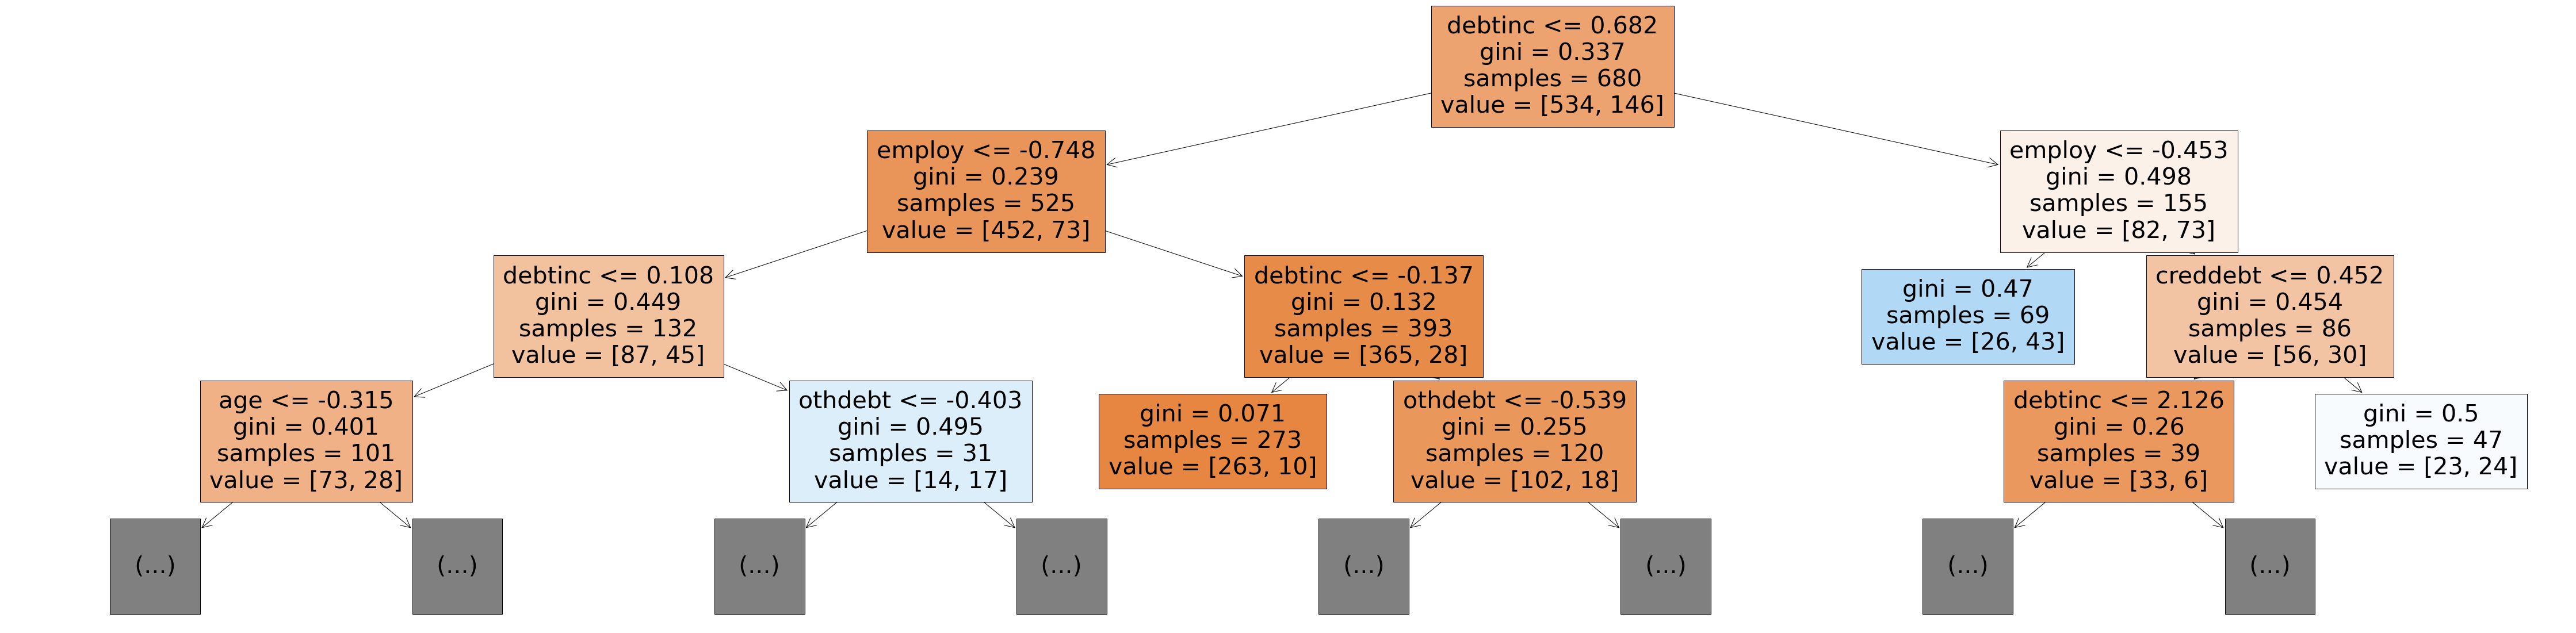

In [50]:
#Visualizing a Decision Tree using  graphviz package
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True);
